# <u>Predicting House Prices using regression techniques</u>

 - <font size =4>The aim of this project is to evaluate the **House Price per unit area** for the given real estate data.
 - This project uses different regression techniques like <font color='red'>**linear regression , lasso regression , ridge regression and polynomial regression**</font> to predict the house prices for the data .</font>
 - <font size = 4>There are 6 independent features in the data set and the dependent feature called the **House Price of unit area**</font>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import math
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv(r"D:\ML\Combined Regressions\train_Real estate.csv",low_memory = False)

In [7]:
df_raw.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
len(df_raw)

414

# Splitting dependent variable...
- The below code cell splits the dataframe into dependent and independent variables.
- **df_trn** contains the independent variables.
- **y** contains the dependent variable.

In [25]:
df_trn = df_raw.drop("Y house price of unit area",axis = 1)
y = df_raw["Y house price of unit area"].copy()

## Evaluation metric -  RMSE 
- The **root mean squared error** was calculated for the the predicted values and the actual values of the **dependent variable** in the data set that was given.
- **NOTE** data was not scaled before evaluation and hence it is not mandatory for the rmse to lie between 0 and 1.


In [4]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [5]:
def split_values(a,n):
    return a[:n],a[n:]

In [10]:
df_raw.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## CORRELATION MATRIX
- A **Pearson Coefficient of Correlation** was calculated for each of the variables as a correlation matrix to know which variables are actually related to the **house price**
- Through the below correlation matrix, we come to know that **No and the transaction date** are very weakly correlated to the dependent variable of the given data 

In [11]:
df_raw.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Handling missing values.
- The below code shows that there are **no missing values in the data set.**

In [6]:
print("Numer of missing values in the colmumns.")
for i in df_raw.columns:
    print(i,":",len(df_raw)-len(df_raw[i].notnull()))

Numer of missing values in the colmumns.
No : 0
X1 transaction date : 0
X2 house age : 0
X3 distance to the nearest MRT station : 0
X4 number of convenience stores : 0
X5 latitude : 0
X6 longitude : 0
Y house price of unit area : 0


# Variable 1-
### TRANSACTION DATE
- According to the analysis of the **transaction date variable**, it was found that we had a large frequency of some particular dates.
- So the idea to **one - hot encode** the dates according to their values seemed feasible.
- A key point is that it is not clear what actually this transaction date represents. 
- The most suitable explanation can be that eg. 2012.917 represents **2012 + (day number)/365** which would be unique in those 12 values of the transaction date variable.
- Hence <font color =red>**one-hot encoding**</font> **may produce different results**.
- Another key factor was that **correlation** between transaction date and the dependent variable was **quite poor**.

In [15]:
date_c = {}
for i in df_raw['X1 transaction date'].get_values():
    i = round(i,5)
    date_c[i] = date_c.get(i,0)+1


E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


In [16]:
print(date_c)

{2012.917: 38, 2013.583: 23, 2013.5: 47, 2012.833: 31, 2012.667: 30, 2013.417: 58, 2013.083: 46, 2013.333: 29, 2013.25: 32, 2012.75: 27, 2013.0: 28, 2013.167: 25}


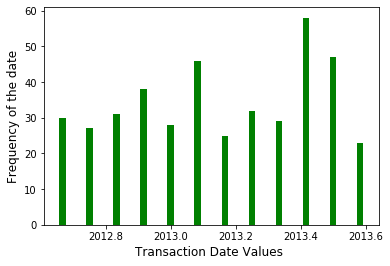

In [17]:
keys = date_c.keys()
vals = date_c.values()
plt.xlabel("Transaction Date Values ",fontsize = 12)
plt.ylabel("Frequency of the date",fontsize = 12)
plt.bar(keys,vals,width = 0.02,color = 'g')
plt.savefig(r'D:\ML\Combined regressions\transactionDate.png',dpi =250)

## Dummy variables for transaction date

In [18]:
dates = pd.get_dummies(df_raw['X1 transaction date'])
dates.head()

,2012.667,2012.750,2012.833,2012.917,2013.000,2013.083,2013.167,2013.250,2013.333,2013.417,2013.500,2013.583
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0


## Concatenating to new data frame 

In [19]:
new = pd.concat([df_raw,dates],axis = 1)

In [20]:
new= new.drop('X1 transaction date',axis = 1)

In [21]:
new_trn = new.drop('Y house price of unit area',axis = 1)


In [22]:
new_trn = new_trn.drop('No',axis=1)

##  **new_trn** is a new dataframe that contains the <font color = red> one-hot encoded </font> dates.

In [23]:
new_trn.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,2012.6670000000001,2012.75,2012.8329999999999,2012.9170000000001,2013.0,2013.0829999999999,2013.1670000000001,2013.25,2013.3329999999999,2013.4170000000001,2013.5,2013.5829999999999
0,32.0,84.87882,10,24.98298,121.54024,0,0,0,1,0,0,0,0,0,0,0,0
1,19.5,306.59470,9,24.98034,121.53951,0,0,0,1,0,0,0,0,0,0,0,0
2,13.3,561.98450,5,24.98746,121.54391,0,0,0,0,0,0,0,0,0,0,0,1
3,13.3,561.98450,5,24.98746,121.54391,0,0,0,0,0,0,0,0,0,0,1,0
4,5.0,390.56840,5,24.97937,121.54245,0,0,1,0,0,0,0,0,0,0,0,0


## <u>Scatter plots for Independent v/s Dependent variable</u>

# Variable 2-

## House Age
- According to the produced scatter plot it was noted that the variable had a very good fit for the polynomials of **degree 2 and 3**.
- **Line of best fit** was not able to model the data points as accurately.
- From the scatter plot,it was also noted that polynomials with **degree >3** were not behaving optimally for larger ranges of the data 

No handles with labels found to put in legend.


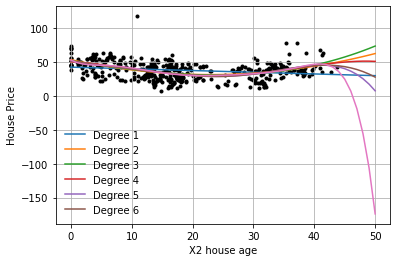

In [28]:
plt.xlabel("X2 house age")
plt.ylabel("House Price")
plt.grid()
plt.scatter(df_raw["X2 house age"],df_raw["Y house price of unit area"],marker = '.',color = 'black')
xval = [i for i in range(51)]
for i in range(1,8):
    poly2 = np.polyfit(df_raw["X2 house age"],df_raw["Y house price of unit area"],i)
    p2 = np.poly1d(poly2)
    plt.legend(frameon = False)
    plt.plot(xval,p2(xval),linestyle = '-',label = 'Degree '+str(i))
plt.savefig(r'D:\ML\Combined regressions\houseAge.png',dpi = 250)

# Variable 3-

## Distance to the nearest MRT station
- Again it was noted that the variable had a very good fit for the polynomials of **degree 2 and 3**.
- **Line of best fit** was able to model the data points less accurately.
- From the scatter plot,it was also noted that polynomials with **degree >3** were not behaving optimally for larger ranges of the data and by observation some were also **over-fitting**
### <u>KEY INSIGHT</u>
 - The  plot reveals that the **houses situated nearer to an MRT station have a higher price per unit area**

No handles with labels found to put in legend.


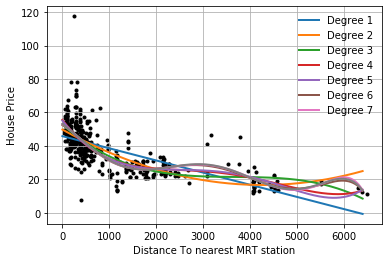

In [69]:

plt.xlabel("Distance To nearest MRT station")
plt.ylabel("House Price")
plt.grid()
plt.scatter(df_raw["X3 distance to the nearest MRT station"],df_raw["Y house price of unit area"],marker = '.',color = 'black')
xval3 = [i for i in range(6400)]
for i in range(1,9):
    poly = np.polyfit(df_raw["X3 distance to the nearest MRT station"],df_raw["Y house price of unit area"],i)
    p = np.poly1d(poly)
    plt.legend(frameon = False)
    #y_val3 = [a4*(i**4)+a3*(i**3)+a2*(i**2)+a1*i+b for i in xval3]
    plt.plot(xval3,p(xval3),linestyle = '-',linewidth = 2.0,label = 'Degree ' + str(i))
plt.savefig(r'D:\ML\Combined regressions\NearestMRTplot.png',dpi = 250)

# Variable 4-

## Number of Convenience Stores
- According to the produced scatter plot it was noted that the variable had a very good fit for the polynomials of **degree 2 and 3**.
- **Line of best fit** was also able to model the data points as accurately.
- From the scatter plot,it was also noted that polynomials with **degree >3** were not behaving optimally for larger ranges of the data and were oscillating between the data points.
- It was noted that the price behaviour was almost **linearly dependendent on the number of convenience stores**

No handles with labels found to put in legend.


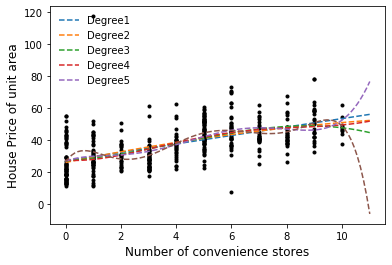

In [76]:
plt.xlabel("Number of convenience stores",fontsize = 12)
plt.ylabel("House Price of unit area",fontsize = 12)
plt.scatter(df_raw["X4 number of convenience stores"],df_raw["Y house price of unit area"],marker = '.',color='black')
x = np.linspace(0,11,100)
for i in range (1,7):
    poly1 = np.polyfit(df_raw['X4 number of convenience stores'],df_raw['Y house price of unit area'],i)
    p1 = np.poly1d(poly1)
    plt.legend(frameon = 0)
    plt.plot(x,p1(x),linestyle= "--",label = "Degree"+str(i))
plt.savefig(r'D:\ML\Combined regressions\ConvenienceStore.png',dpi=250)

# Variable 5-

## Latitude
- According to the produced scatter plot it was noted that the variable had a very good fit for the polynomials of **degree 2 and 3**. Their polynomials were so similar that it can be seen that **only degree 2 is visible** indicating that they are almost overlapping.
- **Line of best fit** was not able to model the data points as accurately.
- From the scatter plot,it was also noted that polynomials with **degree >3** were not behaving optimally for smaller or larger ranges of the data 

No handles with labels found to put in legend.
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


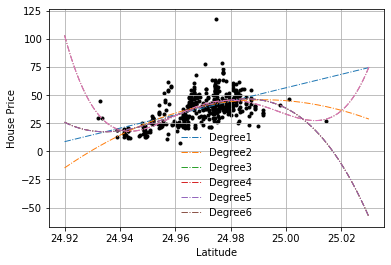

In [82]:
plt.xlabel("Latitude")
plt.ylabel("House Price")
plt.grid()
plt.scatter(df_raw['X5 latitude'],df_raw["Y house price of unit area"],marker = '.',color = 'black')
xval3 = np.linspace(24.92,25.03,400)
for i in range(1,8):
    poly5 = np.polyfit(df_raw['X5 latitude'],df_raw["Y house price of unit area"],i)
    p5 = np.poly1d(poly5)
    plt.legend(frameon = False)
    #y_val3 = [m5*i+b5 for i in xval3]
    plt.plot(xval3,p5(xval3),linestyle = '-.',linewidth = 1,label = 'Degree' + str(i))
plt.savefig(r'D:\ML\Combined Regressions\Latitude.png',dpi=250)

# Variable 6-

## Longitude
- According to the produced scatter plot it was noted that the variable had a very good fit for the polynomials of **degree 2 and 3**. Their polynomials were so similar that it can be seen that **only degree 2 is visible** indicating that they are almost overlapping.
- **Line of best fit** was not able to model the data points as accurately.
- From the scatter plot,it was also noted that polynomials with **degree >3** were not behaving optimally for smaller or larger ranges of the data 

No handles with labels found to put in legend.
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys
E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:7: RankWarning: Polyfit may be poorly conditioned
  import sys


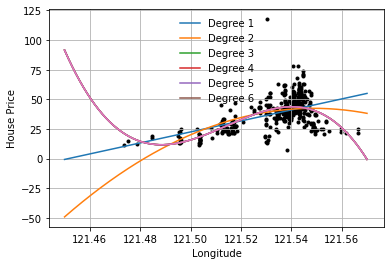

In [84]:
plt.xlabel("Longitude")
plt.ylabel("House Price")
plt.grid()
plt.scatter(df_raw['X6 longitude'],df_raw["Y house price of unit area"],marker = '.',color = 'black')
xval3 = np.linspace(121.45,121.57,400)
for i in range(1,8):
    poly3 = np.polyfit(df_raw['X6 longitude'],df_raw["Y house price of unit area"],i)
    p3 = np.poly1d(poly3)
    plt.legend(frameon = False)
    plt.plot(xval3,p3(xval3),linestyle = "-",linewidth= 1.5,label = "Degree "+str(i))
plt.savefig(r'D:\ML\Combined Regressions\Longitude.png',dpi=250)

## Inferences from scatter plot analysis 
- It was seen that in almost all the cases of the scatter plots, **POLYNOMIAL REGRESSIONS OF DEGREE 2 AND DEGREE 3 WERE FITTING JUST RIGHT**.
- From this observation it was inferred that a **polynomial mulitivariate regression** must be the best fit for the data.


In [29]:
df_trn.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [30]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

## SPLITTING DATA SET FOR TRAINING AND VALIDATION OF MODEL
- **x_train** and **x_train2** refer to the training data sets.
- **x_train** does not have **no**  column.
- **x_train2** does not have the **no** column but has the transaction date column as **one_hot encoded columns**

In [88]:
n = len(df_raw) - 83
x_train , x_valid = split_values(df_trn,n)
y_train , y_valid = split_values(y,n)

In [69]:
x_train2,x_valid2 = split_values(new_trn,n)

In [28]:
def print_score(m,x_train,x_valid):
    res = [rmse(m.predict(x_train),y_train),rmse(m.predict(x_valid),y_valid),
          m.score(x_train,y_train),m.score(x_valid,y_valid)]
    for i in range(len(res)):
        res[i] = round(res[i],7)
    print(" RMSE for training :",res[0],"RSME for validation:",res[1],'\n',
         "Score for training set(R^2):",res[2],"Score for validation set(R^2)",res[3])

In [89]:
x_train = x_train.drop(['No'],axis =1)


In [90]:
x_valid = x_valid.drop(['No'],axis =1)

# <font size=6> Importing Models</font>
- Linear models based on **ORDINARY LEAST SQUARES**, **LASSO** and **RIDGE** regressions were imported from the sklearn library.
- **Pipeline** method of the pipepline class and **PolynomialFeatures** method of the preprocessing class were imported to transfrom the variables into the appropriate combinations required for the **polynomial multivaraiate regressions** of a paticular **degree i**
- The following images give some insight about the models and the methods used.

#  -Ordinary Least Squared error  
- **where xij's represent ith independent variable and its jth value and mi represents the coefficient of that variable in the best fit hyperplane**

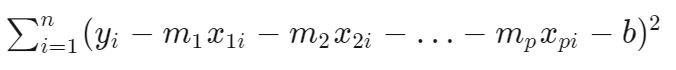

In [39]:
Image("D:\ML\Multivariate Regression\images\error.png")

# -Lasso Regression
- One **key difference** to note here is the  **lambda value** which is basically a parameter for the minimization of the **absolute values of the individual weights** of the variables.
- It is represented as **alpha** in the sklearn model.

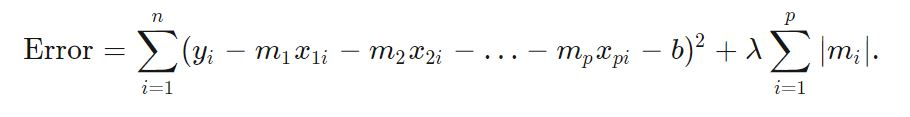

In [40]:
Image("D:\ML\Combined regressions\Lasso.JPG")

# -Ridge Regression
- Again in ridge regression the  **lambda value** is a parameter for the minimization of the **sum of squares of individual weights** of the variables.
- It is represented as **alpha** in the sklearn model.

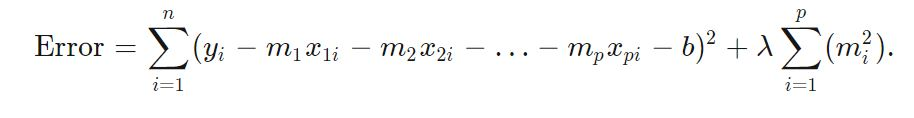

In [41]:
Image("D:\ML\Combined regressions\Ridge.JPG")

# -Explanation of how **polynomial features** transforms the variables according to the given degree.

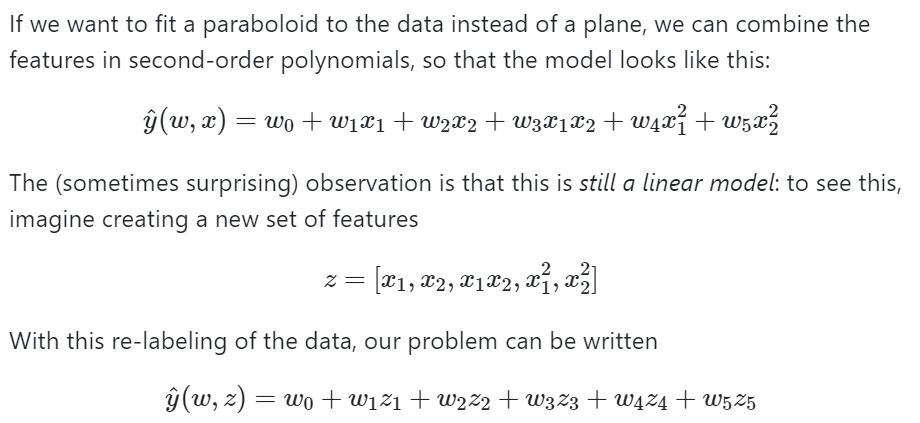

In [38]:
Image("D:/ML/PolynomialRegression/pipeline.JPG")

In [31]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# BUILDING MODELS
- Although from the above analysis of our data, it was noted that the data fitted quite nicely for higher degree models namely for **degrees 2 and 3** but still models were fitted on the data so as to get a relative understanding of the rmse and the scores.


In [92]:
linear = LinearRegression(n_jobs = -1)
ridge = Ridge(alpha = 100.0)
lasso = Lasso(alpha = 100.0)


# <u>Linear Models</u>

- <font size =5> FOR **x_train** and **x_valid** without one hot encoding.

In [93]:
linear.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
print("\nLinear regression with least squares")
print_score(linear,x_train,x_valid)
print("Linear Ridge regression")
print_score(ridge,x_train,x_valid)
print("Linear Lasso regression")
print_score(lasso,x_train,x_valid)



Linear regression with least squares
 RMSE for training : 9.0396706 RSME for validation: 7.7077393 
 Score for training set(R^2): 0.5761927 Score for validation set(R^2) 0.6095375
Linear Ridge regression
 RMSE for training : 9.4632122 RSME for validation: 7.8097169 
 Score for training set(R^2): 0.5355484 Score for validation set(R^2) 0.5991371
Linear Lasso regression
 RMSE for training : 10.4348863 RSME for validation: 8.3093952 
 Score for training set(R^2): 0.4352728 Score for validation set(R^2) 0.5462004


# - FOR **x_train2** and **x_valid2** with one hot encoding.

In [94]:
linear.fit(x_train2,y_train)
ridge.fit(x_train2,y_train)
lasso.fit(x_train2,y_train)
print("\nLinear regression with least squares")
print_score(linear,x_train2,x_valid2)
print("Linear Ridge regression")
print_score(ridge,x_train2,x_valid2)
print("Linear Lasso regression")
print_score(lasso,x_train2,x_valid2)



Linear regression with least squares
 RMSE for training : 8.9464449 RSME for validation: 7.544146 
 Score for training set(R^2): 0.584889 Score for validation set(R^2) 0.6259364
Linear Ridge regression
 RMSE for training : 9.4220732 RSME for validation: 7.7685093 
 Score for training set(R^2): 0.5395778 Score for validation set(R^2) 0.6033562
Linear Lasso regression
 RMSE for training : 10.4348863 RSME for validation: 8.3093952 
 Score for training set(R^2): 0.4352728 Score for validation set(R^2) 0.5462004


# From the above models, it was noted that **none of them** predicted the values of house prices optimally as the validation set and the training set scores were very low. 

#  <u>Polynomial Models </u>

# - FOR **x_train** and **x_valid** without one hot encoding.

Multivariate OLS regression

Linear Multivariate regression of degree 1
 RMSE for training : 9.0396706 RSME for validation: 7.7077393 
 Score for training set(R^2): 0.5761927 Score for validation set(R^2) 0.6095375
Wall time: 8.6 ms

Linear Multivariate regression of degree 2
 RMSE for training : 7.598893 RSME for validation: 6.5540188 
 Score for training set(R^2): 0.7005227 Score for validation set(R^2) 0.7176806
Wall time: 8.05 ms

Linear Multivariate regression of degree 3
 RMSE for training : 10.2050938 RSME for validation: 13.3354651 
 Score for training set(R^2): 0.4598713 Score for validation set(R^2) -0.1688039
Wall time: 10.9 ms

Linear Multivariate regression of degree 4
 RMSE for training : 5.9878888 RSME for validation: 36.7291984 
 Score for training set(R^2): 0.8140438 Score for validation set(R^2) -7.8664181
Wall time: 25.4 ms

Linear Multivariate regression of degree 5
 RMSE for training : 5.6513027 RSME for validation: 162.1352651 
 Score for training set(R^2): 0.8343

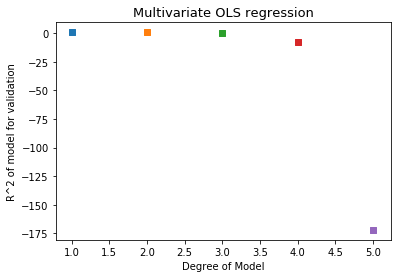

In [110]:
print("Multivariate OLS regression")
plt.title("Multivariate OLS regression",fontsize = 13)
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
linear = []
for i in range(1,7):
    modelL = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression(fit_intercept=False))])
    modelL.fit(x_train,y_train)
    print("\nLinear Multivariate regression of degree",i)
    %time print_score(modelL,x_train,x_valid)
    if(i<6):
        plt.scatter(i,modelL.score(x_valid,y_valid),marker = ',')
    if(i<4):
        linear.append(modelL.score(x_valid,y_valid))
plt.savefig("D:\ML\Combined Regressions\Ols_1_all.png",dpi=250)

### Since the **R^2 variation** in the model wasn't visisble clearly, another scatter plot was drawn showing only the **first three degrees** and it is clear that degree 3 was the best fit

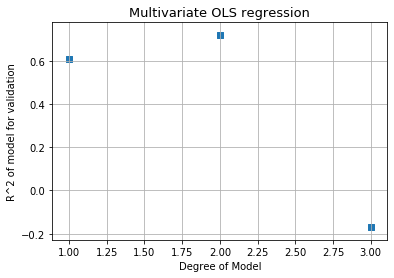

In [109]:
plt.title("Multivariate OLS regression",fontsize = 13)
plt.grid()
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
plt.scatter([1,2,3],linear,marker = ',')
plt.savefig("D:\ML\Combined Regressions\Ols_1_first3.png",dpi=250)

Multivariate Lasso regression

Lasso Multivariate regression of degree 1
 RMSE for training : 10.4343887 RSME for validation: 8.3111105 
 Score for training set(R^2): 0.4353267 Score for validation set(R^2) 0.546013
Wall time: 6.22 ms

Lasso Multivariate regression of degree 2
 RMSE for training : 8.7788972 RSME for validation: 7.4324595 
 Score for training set(R^2): 0.6002917 Score for validation set(R^2) 0.63693
Wall time: 12.7 ms

Lasso Multivariate regression of degree 3
 RMSE for training : 8.5408635 RSME for validation: 7.395282 
 Score for training set(R^2): 0.6216734 Score for validation set(R^2) 0.6405531
Wall time: 15 ms

Lasso Multivariate regression of degree 4


E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12153.868275334486, tolerance: 53.917434000000014
  positive)
E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12116.052066219587, tolerance: 53.917434000000014
  positive)
E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11436.24005834365, tolerance: 53.917434000000014
  positive)


 RMSE for training : 8.2901543 RSME for validation: 8.0380399 
 Score for training set(R^2): 0.6435583 Score for validation set(R^2) 0.5753554
Wall time: 37.8 ms


E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10739.361673352973, tolerance: 53.917434000000014
  positive)



Lasso Multivariate regression of degree 5
 RMSE for training : 8.0489936 RSME for validation: 7.2640419 
 Score for training set(R^2): 0.6639945 Score for validation set(R^2) 0.6531977
Wall time: 72.4 ms


E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10199.83226575185, tolerance: 53.917434000000014
  positive)



Lasso Multivariate regression of degree 6
 RMSE for training : 7.8451658 RSME for validation: 7.3342357 
 Score for training set(R^2): 0.6807966 Score for validation set(R^2) 0.6464629
Wall time: 114 ms


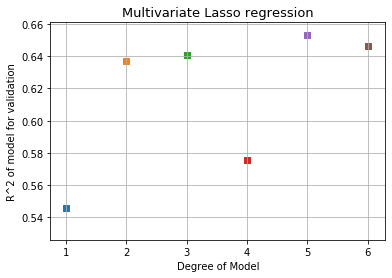

In [108]:
print("Multivariate Lasso regression")
plt.title("Multivariate Lasso regression",fontsize = 13)
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
plt.grid()
for i in range(1,7):
    modelLa = Pipeline([('poly',PolynomialFeatures(degree=i)),('lasso',Lasso(alpha=100,fit_intercept=False))])
    modelLa.fit(x_train,y_train)
    print("\nLasso Multivariate regression of degree",i)
    %time print_score(modelLa,x_train,x_valid)
    plt.scatter(i,modelLa.score(x_valid,y_valid),marker = ',')
plt.savefig("D:\ML\Combined Regressions\lasso_1_all.png",dpi = 250)

Multivariate Ridge regression

Ridge Multivariate regression of degree 1
 RMSE for training : 9.5137287 RSME for validation: 7.8700759 
 Score for training set(R^2): 0.5305765 Score for validation set(R^2) 0.5929168
Wall time: 2 ms

Ridge Multivariate regression of degree 2
 RMSE for training : 7.8332263 RSME for validation: 6.7778 
 Score for training set(R^2): 0.6817674 Score for validation set(R^2) 0.6980724
Wall time: 11.3 ms

Ridge Multivariate regression of degree 3
 RMSE for training : 7.2897702 RSME for validation: 6.5817826 
 Score for training set(R^2): 0.7243926 Score for validation set(R^2) 0.7152837
Wall time: 11.6 ms

Ridge Multivariate regression of degree 4
 RMSE for training : 6.273472 RSME for validation: 29.2899524 
 Score for training set(R^2): 0.795883 Score for validation set(R^2) -4.6384877
Wall time: 24.8 ms

Ridge Multivariate regression of degree 5


E:\ANACONDA\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


 RMSE for training : 7.6666405 RSME for validation: 16.6584212 
 Score for training set(R^2): 0.6951589 Score for validation set(R^2) -0.8238662
Wall time: 75.3 ms


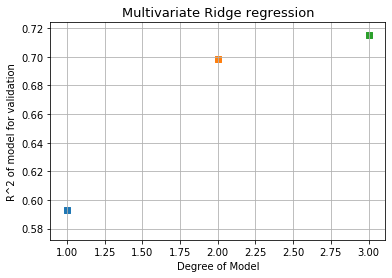

In [107]:
print("Multivariate Ridge regression")
plt.grid()
plt.title("Multivariate Ridge regression",fontsize = 13)
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
for i in range(1,6):
    modelR = Pipeline([('poly',PolynomialFeatures(degree=i)),('ridge',Ridge(alpha=100,fit_intercept=False))])
    modelR.fit(x_train,y_train)
    print("\nRidge Multivariate regression of degree",i)
    %time print_score(modelR,x_train,x_valid)
    if(i<4):
        plt.scatter(i,modelR.score(x_valid,y_valid),marker = ',')
plt.savefig(r"D:\ML\Combined Regressions\ridge_1_all.png",dpi=250)

# **Inference** 
 - It is observed from the models that in all the models the **degree 3** model was the best fit for the given data and moreover the **ordinary least squares method** had the best validation set scores of 0.71

# - FOR **x_train2** and **x_valid2** with one hot encoding.

Multivariate OLS regression with one_hot encoding

Linear Multivariate regression of degree 1
 RMSE for training : 8.9464449 RSME for validation: 7.544146 
 Score for training set(R^2): 0.584889 Score for validation set(R^2) 0.6259364
Wall time: 7.28 ms

Linear Multivariate regression of degree 2
 RMSE for training : 6.6485681 RSME for validation: 9.2022346 
 Score for training set(R^2): 0.7707446 Score for validation set(R^2) 0.4434401
Wall time: 13.2 ms

Linear Multivariate regression of degree 3
 RMSE for training : 7.8683899 RSME for validation: 38.4757875 
 Score for training set(R^2): 0.6789039 Score for validation set(R^2) -8.7297199
Wall time: 97.6 ms

Linear Multivariate regression of degree 4
 RMSE for training : 2.0350317 RSME for validation: 6876.7503041 
 Score for training set(R^2): 0.9785214 Score for validation set(R^2) -310806.7326634
Wall time: 506 ms

Linear Multivariate regression of degree 5
 RMSE for training : 0.7104536 RSME for validation: 101200.8414709 
 Score

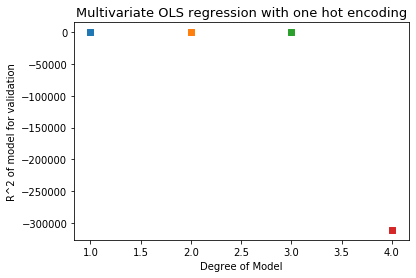

In [111]:
print("Multivariate OLS regression with one_hot encoding")
plt.title("Multivariate OLS regression with one hot encoding",fontsize = 13)
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
linear2 = []
for i in range(1,6):
    modelL = Pipeline([('poly', PolynomialFeatures(degree=i)), ('linear', LinearRegression(fit_intercept=False))])
    modelL.fit(x_train2,y_train)
    print("\nLinear Multivariate regression of degree",i)
    %time print_score(modelL,x_train2,x_valid2)
    if(i<5):
        plt.scatter(i,modelL.score(x_valid2,y_valid),marker = ',')
    if(i<3):
        linear2.append(modelL.score(x_valid2,y_valid))
plt.savefig("D:\ML\Combined Regressions\Ols_2_all.png",dpi=250)

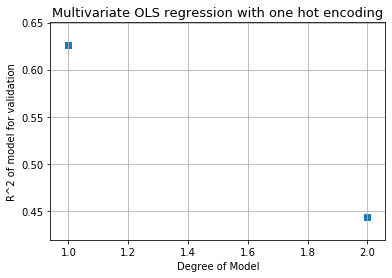

In [112]:
plt.title("Multivariate OLS regression with one hot encoding",fontsize = 13)
plt.grid()
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
plt.scatter([1,2],linear2,marker = ',')
plt.savefig("D:\ML\Combined Regressions\Ols_2_first2.png",dpi=250)

Multivariate Lasso regression with one-hot encoding

Lasso Multivariate regression of degree 1
 RMSE for training : 10.4965908 RSME for validation: 8.428588 
 Score for training set(R^2): 0.4285743 Score for validation set(R^2) 0.5330881
Wall time: 8.98 ms

Lasso Multivariate regression of degree 2
 RMSE for training : 8.6551122 RSME for validation: 7.862896 
 Score for training set(R^2): 0.6114842 Score for validation set(R^2) 0.5936593
Wall time: 32.3 ms


E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1831.3534398055817, tolerance: 53.917434000000014
  positive)
E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10579.250457024767, tolerance: 53.917434000000014
  positive)



Lasso Multivariate regression of degree 3
 RMSE for training : 7.7836911 RSME for validation: 7.5497277 
 Score for training set(R^2): 0.6857795 Score for validation set(R^2) 0.6253827
Wall time: 139 ms


E:\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6422.562222249175, tolerance: 53.917434000000014
  positive)



Lasso Multivariate regression of degree 4
 RMSE for training : 5.5853306 RSME for validation: 14.6450873 
 Score for training set(R^2): 0.8382065 Score for validation set(R^2) -0.4096433
Wall time: 753 ms


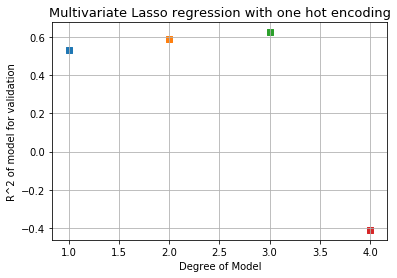

In [113]:
print("Multivariate Lasso regression with one-hot encoding")
plt.title("Multivariate Lasso regression with one hot encoding",fontsize = 13)
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
plt.grid()
for i in range(1,5):
    modelLa = Pipeline([('poly',PolynomialFeatures(degree=i)),('lasso',Lasso(alpha=100,fit_intercept=False))])
    modelLa.fit(x_train2,y_train)
    print("\nLasso Multivariate regression of degree",i)
    %time print_score(modelLa,x_train2,x_valid2)
    plt.scatter(i,modelLa.score(x_valid2,y_valid),marker = ',')
plt.savefig("D:\ML\Combined Regressions\lasso_2_all.png",dpi=250)

Multivariate Ridge regression

Ridge Multivariate regression of degree 1
 RMSE for training : 9.4219495 RSME for validation: 7.7685017 
 Score for training set(R^2): 0.5395899 Score for validation set(R^2) 0.603357
Wall time: 15.7 ms

Ridge Multivariate regression of degree 2
 RMSE for training : 7.3618347 RSME for validation: 6.8748028 
 Score for training set(R^2): 0.7189165 Score for validation set(R^2) 0.6893683
Wall time: 40.8 ms

Ridge Multivariate regression of degree 3


E:\ANACONDA\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


 RMSE for training : 7.6953934 RSME for validation: 7.2431622 
 Score for training set(R^2): 0.6928681 Score for validation set(R^2) 0.6551885
Wall time: 140 ms


E:\ANACONDA\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "



Ridge Multivariate regression of degree 4
 RMSE for training : 9.9759124 RSME for validation: 21.5288434 
 Score for training set(R^2): 0.4838588 Score for validation set(R^2) -2.0462581
Wall time: 584 ms


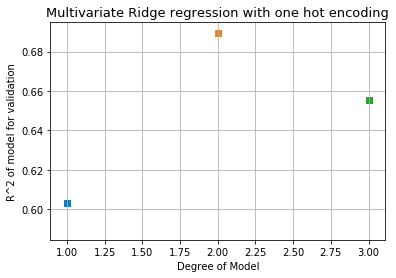

In [116]:
print("Multivariate Ridge regression")
plt.grid()
plt.title("Multivariate Ridge regression with one hot encoding",fontsize = 13)
plt.xlabel("Degree of Model")
plt.ylabel("R^2 of model for validation")
for i in range(1,5):
    modelR = Pipeline([('poly',PolynomialFeatures(degree=i)),('ridge',Ridge(alpha=100,fit_intercept=False))])
    modelR.fit(x_train2,y_train)
    print("\nRidge Multivariate regression of degree",i)
    %time print_score(modelR,x_train2,x_valid2)
    if(i<4):
        plt.scatter(i,modelR.score(x_valid2,y_valid),marker = ',')
plt.savefig(r"D:\ML\Combined Regressions\ridge_2_all.png",dpi=250)

## -  So, we see that the **one hot encoded variable** was infact not really important for the predictions as the **R-squared** of our models **went down** in each case. 
## - Hence, removing the column in the start was the better choice.

# Final Model and improving scores

- The final model considered was thus the **Polynomial regression model with Ridge Regression**.
- Degree of model chosen was 3.
- The R- squared of the model for validation set was **0.7153** and **RMSE** was 6.58.
- It was noted that since in these models we assumed some kind of linear relationship between the variables and then set out to make the model upon that, it may be so that our assumption was not correct.
- Models like **Random Forests** and **K nearest neighbours** may further be explored with this dataset.